In [1]:
from doe_modules.design import FullFactorial, PlackettBurman, CLOO

In [2]:
import numpy as np
from statsmodels.tools import add_constant

In [3]:
X_cloo = add_constant(CLOO().get_exmatrix(9)().values)
X_pb = add_constant(PlackettBurman().get_exmatrix(9)().values)
X_ff = add_constant(FullFactorial().get_exmatrix(9)().values)


X_cloo_int = CLOO().get_exmatrix(9).interactions(2).iloc[:, 9:].values
X_pb_int = PlackettBurman().get_exmatrix(9).interactions(2).iloc[:, 9:].values
X_ff_int = FullFactorial().get_exmatrix(9).interactions(2).iloc[:, 9:].values

In [4]:
P = lambda mat: mat @ np.linalg.inv(mat.T @ mat) @ mat.T

In [5]:
np.linalg.norm(P(X_cloo) @ X_cloo_int)

18.97366596101024

In [6]:
np.linalg.norm(P(X_pb) @ X_pb_int)

18.33030277982336

In [7]:
np.linalg.norm(P(X_ff) @ X_ff_int)

0.0

In [8]:
import matplotlib.pyplot as plt

In [9]:
def interaction_absorption(design, n_factor, order, n_rep=1):
    X = design().get_exmatrix(n_factor)
    P = lambda mat: mat @ np.linalg.inv(mat.T @ mat) @ mat.T
    PX = P(add_constant(np.vstack([X().values] * n_rep)))
    X_int = np.vstack([X.interactions(order).iloc[:, n_factor:].values] * n_rep)
    return np.trace(X_int.T @ PX @ X_int) / np.trace(X_int.T @ X_int)

In [10]:
def inter1(design, n_factor, order, n_rep=1):
    X = design().get_exmatrix(n_factor)
    P = lambda mat: mat @ np.linalg.inv(mat.T @ mat) @ mat.T
    PX = P(add_constant(np.vstack([X().values] * n_rep)))
    X_int = np.vstack([X.interactions(order).iloc[:, n_factor:].values] * n_rep)
    return X_int.T @ PX @ X_int


# def inter2(design, n_factor, order, n_rep=1):
#     X = design().get_exmatrix(n_factor)
#     P = lambda mat: mat @ np.linalg.inv(mat.T @ mat) @ mat.T
#     PX = P(add_constant(np.vstack([X().values] * n_rep)))
#     X_int = np.vstack([X.interactions(order).iloc[:, n_factor:].values] * n_rep)
#     return X_int.T @ X_int

# def inter3(design, n_factor, order, n_rep=1):
#     return inter1(design, n_factor, order, n_rep) / inter2(design, n_factor, order, n_rep)

In [11]:
n = np.arange(2, 13)

abs_cloo = np.vectorize(lambda x: interaction_absorption(CLOO, x, 2))(n)
abs_pb = np.vectorize(lambda x: interaction_absorption(PlackettBurman, x, 2))(n)
abs_ff = np.vectorize(lambda x: interaction_absorption(FullFactorial, x, 2))(n)

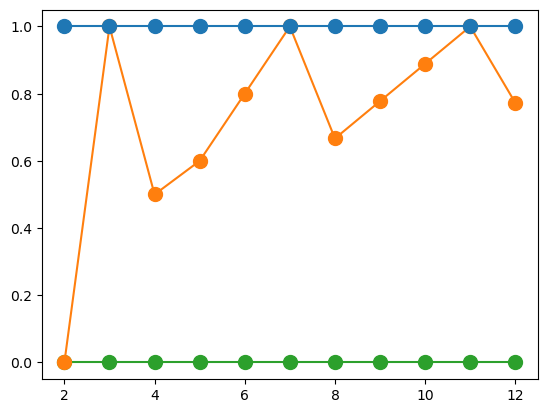

In [12]:
fig, ax = plt.subplots()

ax.plot(n, abs_cloo, marker="o", markersize=10, label="C+LOO", zorder=1)
ax.plot(n, abs_pb, marker="o", markersize=10, label="PB", zorder=0)
ax.plot(n, abs_ff, marker="o", markersize=10, label="FF", zorder=-1)

In [13]:
abs_cloo

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
interaction_absorption(CLOO, 9, 2)

0.9999999999999981

In [15]:
interaction_absorption(CLOO, 9, 2, 2)

0.9999999999999981

In [16]:
interaction_absorption(CLOO, 9, 2, 3)

0.9999999999999836

In [17]:
np.trace(X_cloo_int.T @ P(X_cloo) @ X_cloo_int) / np.trace(X_cloo_int.T @ X_cloo_int)

0.9999999999999981

In [18]:
np.trace(X_pb_int.T @ P(X_pb) @ X_pb_int) / np.trace(X_pb_int.T @ X_pb_int)

0.7777777777777776

In [19]:
np.trace(X_ff_int.T @ P(X_ff) @ X_ff_int) / np.trace(X_ff_int.T @ X_ff_int)

0.0

In [20]:
np.linalg.norm(P(np.vstack([X_cloo] * 3)) @ np.vstack([X_cloo_int] * 3))

32.86335345030943

In [21]:
np.linalg.norm(P(np.vstack([X_pb] * 3)) @ np.vstack([X_pb_int] * 3))

31.749015732775103

In [22]:
np.linalg.norm(P(np.vstack([X_ff] * 3)) @ np.vstack([X_ff_int] * 3))

1.7658252597036073e-14

In [23]:
CLOO().get_exmatrix(9).interactions(2).iloc[:, 9:]

,X1X2,X1X3,X1X4,X1X5,X1X6,X1X7,X1X8,X1X9,X2X3,X2X4,...,X5X6,X5X7,X5X8,X5X9,X6X7,X6X8,X6X9,X7X8,X7X9,X8X9
#1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
#2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
#3,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
#4,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
#5,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
#6,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0
#7,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
#8,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,...,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
#9,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
#10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0


In [24]:
def t2dfi(model_mtx, idx):
    ncol = model_mtx.shape[-1]
    return np.linalg.matrix_rank(P(model_mtx)) - np.linalg.matrix_rank(P(model_mtx[:, [i for i in np.arange(ncol) if i != idx]]))


def t2dfe(model_mtx):
    nrow = model_mtx.shape[0]
    return np.linalg.matrix_rank(np.eye(nrow)) - np.linalg.matrix_rank(P(model_mtx))

def t2dfe2(model_mtx):
    nrow = model_mtx.shape[0]
    return np.linalg.matrix_rank(np.eye(nrow) - P(model_mtx))

In [25]:
t2dfi(X_cloo, 1)

1

In [26]:
t2dfe2(X_cloo)

9

In [27]:
X_cloo[:, 1]

array([ 1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [28]:
np.linalg.matrix_rank(
    (np.eye(10) - P(X_cloo[:, [i for i in np.arange(10) if i != 1]])) @ X_cloo[:, 1].reshape(-1, 1)
)

1

In [29]:
np.linalg.matrix_rank(
    (np.eye(10) - P(X_cloo[:, [i for i in np.arange(10) if i != 1]])) @ X_cloo[:, 1].reshape(-1, 1)
)

1

In [30]:
np.linalg.matrix_rank(P(X_cloo)) - np.linalg.matrix_rank(P(X_cloo[:, [i for i in np.arange(10) if i != 1]]))

1

In [31]:
np.linalg.matrix_rank(P(X_cloo) - P(X_cloo[:, [i for i in np.arange(10) if i != 1]]))

3

In [32]:
P(X_cloo) - P(X_cloo[:, [i for i in np.arange(10) if i != 1]])

array([[ 5.00000000e-01, -5.00000000e-01,  7.77156117e-16,
         7.77156117e-16,  7.77156117e-16,  9.99200722e-16,
        -3.33066907e-16, -1.11022302e-16,  1.38777878e-15,
         1.60982339e-15],
       [-5.00000000e-01,  5.00000000e-01, -3.55271368e-15,
        -4.10782519e-15, -1.77635684e-15, -1.66533454e-15,
        -2.66453526e-15, -1.99840144e-15, -1.05471187e-15,
        -8.32667268e-16],
       [ 5.55111512e-17,  9.43689571e-16, -9.99200722e-16,
        -1.22124533e-15,  5.55111512e-16,  6.66133815e-16,
        -6.66133815e-16,  2.22044605e-16,  1.11022302e-15,
         1.60982339e-15],
       [-2.69229083e-15, -2.69229083e-15, -3.24740235e-15,
        -3.10862447e-15, -2.19269047e-15, -2.08166817e-15,
        -3.41393580e-15, -2.96984659e-15, -1.63757896e-15,
        -2.02615702e-15],
       [ 1.55431223e-15,  2.44249065e-15,  1.88737914e-15,
         2.10942375e-15,  2.88657986e-15,  2.60902411e-15,
         2.38697950e-15,  2.60902411e-15,  3.49720253e-15,
         3.

In [33]:
Pr = P(X_cloo[:, [i for i in np.arange(10) if i != 1]])
Mr = np.eye(10) - Pr
Xa = X_cloo[:, 1].reshape(-1, 1)

P(Mr @ Xa) == P(X_cloo) - P(X_cloo[:, [i for i in np.arange(10) if i != 1]])

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [34]:
hoge = np.random.randn(10).reshape(-1, 1)
hoge

array([[ 0.18803132],
       [-1.50538056],
       [ 1.00683756],
       [ 2.6288954 ],
       [-0.37344244],
       [ 0.840924  ],
       [ 0.37280116],
       [-0.27012791],
       [ 2.47035905],
       [ 0.11907046]])

In [35]:
np.linalg.matrix_rank(P(X_cloo))

10

In [36]:
np.linalg.matrix_rank(P(np.vstack([X_cloo] * 3)))

10

In [37]:
P(np.vstack([X_cloo] * 3)).shape

(30, 30)

In [38]:
P(X_cloo).shape

(10, 10)

In [39]:
t2dfi(np.vstack([X_cloo] * 3), 1)

1

In [40]:
t2dfe(np.vstack([X_cloo] * 3))

20

In [41]:
t2dfe(X_cloo)

0

In [42]:
def t2P(model_mtx, idx):
    ncol = model_mtx.shape[-1]
    return P(model_mtx) - P(model_mtx[:, [i for i in np.arange(ncol) if i != idx]])

In [43]:
np.linalg.matrix_rank(P(X_cloo)) - np.linalg.matrix_rank(P(X_cloo[:, [i for i in np.arange(9 + 1) if i != 1]]))

1

In [44]:
np.linalg.matrix_rank(np.eye(*P(X_cloo).shape)) - np.linalg.matrix_rank(P(X_cloo))

0

In [45]:
np.linalg.matrix_rank(t2P(X_cloo, 1))

3

In [46]:
np.linalg.matrix_rank(1 - P(X_cloo))

10

In [47]:
[np.arange(1, 9 + 1)]

[array([1, 2, 3, 4, 5, 6, 7, 8, 9])]

In [48]:
(X_cloo[:, 0] == 1).all()

True

In [49]:
from doe_modules.simulation import Sim1, MLR, Test4, Circuit, Sparse, TheoreticalEffects

In [50]:
# model = Sim1()
model = Circuit()
# model = Test4(edge_assignsment=np.ones(10))
model.simulate(design=FullFactorial)

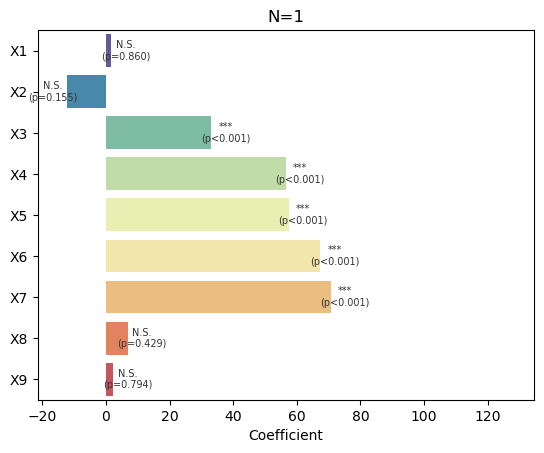

In [51]:
fig, ax = plt.subplots()

model.simulate(design=FullFactorial, n_rep=1)
ff_mlr = MLR(model, interactions=True)
ff_mlr.plot(anova=True, jitter_ratio=.05, ax=ax, show_interactions=False)

from itertools import combinations
import numpy as np
import pandas as pd
from scipy.stats import bootstrap

def theoretical_effects(
    model, 
    interactions: bool = False,
    order: int = np.inf,
    random_state: int = 0,
    n_rep: int = 10,
    model_kwargs: dict = {},
):
    np.random.seed(random_state)
    seeds = np.random.randint(0, 2**32, n_rep)
    effects = []
    order = min(order, model.n_factor)
    for s in seeds:
        model.simulate(
            design=FullFactorial, n_rep=1, random_state=s, 
            model_kwargs=model_kwargs
        )
        mat = model.exmatrix.values
        y = model.exresult
        effects += [(mat[:, idx] * y).mean() for idx in np.arange(model.n_factor)]
        
        if interactions:
            def prod(*idxs):
                ret = 1
                for i in idxs:
                    ret *= mat[:, i]
                return ret
            for n_i in np.arange(2, order + 1):
                effects += [
                    (prod(*idxs) * y).mean() 
                    for idxs in combinations(np.arange(model.n_factor), n_i)
                ]
                
    term_names = eval(f"FullFactorial().get_exmatrix(model.n_factor){'.interactions(order)' if interactions else '()'}")
    
    return pd.DataFrame({
        "Coefficient": effects,
        "term": term_names.columns.tolist() * n_rep
    })

def theoretical_effects_encoder(
    model, 
    interactions: bool = False,
    order: int = np.inf,
    random_state: int = 0,
    n_rep: int = 10,
    model_kwargs: dict = {},
    dtype: type = str,
    kwarg_bootstrap: dict = dict(
        statistic=np.mean, 
        n_resamples=9999, 
        confidence_level=0.95,
        random_state=np.random.default_rng()
    )
): 
    data = theoretical_effects(
        model=model, 
        interactions=interactions, 
        order=min(order, model.n_factor), 
        random_state=random_state,
        n_rep=n_rep,
        model_kwargs=model_kwargs
    )
    
    def identifier(bootstrap_result):
        ci = np.array([
            bootstrap_result.confidence_interval[0],
            bootstrap_result.confidence_interval[1]
        ])
        id_idx = np.sum([int((ci > 0)[1]), int((ci > 0).all())]) - 1
        return ["N.S.", "Up", "Down"][id_idx] if dtype == str else dtype(id_idx)
    
    return pd.DataFrame(
        [
            identifier(bootstrap(
                (data[data.term == factor].Coefficient.values, ),
                **kwarg_bootstrap
            )) for factor in data.term.unique()
        ],
        index=data.term.unique()
    )

def plot_theoretical_effects(
    model, 
    ax: plt.Axes = None,
    cmap: list = None,
    interactions: bool = False,
    order: int = np.inf,
    random_state: int = 0,
    n_rep: int = 10,
    model_kwargs: dict = {},
    kwarg_bootstrap: dict = dict(
        statistic=np.mean, 
        n_resamples=9999, 
        confidence_level=0.95,
        random_state=np.random.default_rng()
    ), 
    jitter_ratio: float = .025, 
    **kwargs
):
    order = min(order, model.n_factor)
    data = theoretical_effects(
        model=model, 
        interactions=interactions, 
        order=order, 
        random_state=random_state,
        n_rep=n_rep,
        model_kwargs=model_kwargs
    )
    signs = theoretical_effects_encoder(
        model=model, 
        interactions=interactions,
        order=order, 
        random_state=random_state,
        n_rep=n_rep,
        dtype=int,
        model_kwargs=model_kwargs,
        kwarg_bootstrap=kwarg_bootstrap
    ).values.ravel()
    _, ax = plt.subplots() if ax is None else None, ax
    
    sns.barplot(
        data=data, x="Coefficient", y="term", ax=ax,
        palette=model.cmap if cmap is None else cmap, 
        edgecolor=model.cmap if cmap is None else cmap,
        alpha=.5,
        n_boot=kwarg_bootstrap["n_resamples"],
        **kwargs
    )
    
    xlims = np.array(ax.get_xlim())
    coef = data.groupby("term").mean().values.ravel()
    
    for i, v in enumerate(signs):
        sign = lambda z: int(z / abs(z))
        jitter = np.diff(xlims) * jitter_ratio
        jitter *= (2 * np.abs(v) - 1) * sign(coef[i])
        x = coef[i] + jitter
        ax.text(
            x, i,
            ["N.S.", "Up", "Down"][v], 
            va="center", 
            ha=["_", "left", "right"][sign(x)],
            size=8
        )

In [52]:
from doe_modules.preferences import kwarg_err

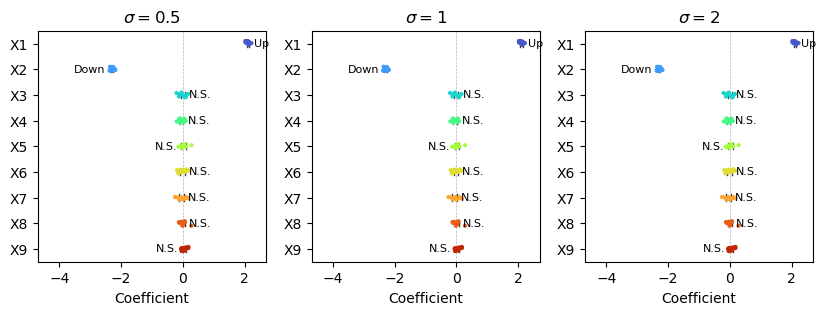

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

model = [Sim1, Circuit, Sparse][-1]()
# jitter_ratio=.04

for sigma, a in zip([.5, 1, 2], ax.ravel()):
    theoretical = TheoreticalEffects(simulation=model)
    theoretical.plot(ax=a, jitter_ratio=.04, xscales=np.array([1.8, 1.1]), **kwarg_err)

    a.set(ylabel="", title="$\sigma=" + f"{sigma}" + "$")
    # a.set_xlim(np.array(a.get_xlim()) * np.array([(1 + jitter_ratio * 20), (1 + jitter_ratio * 2)]))

In [54]:
import seaborn as sns

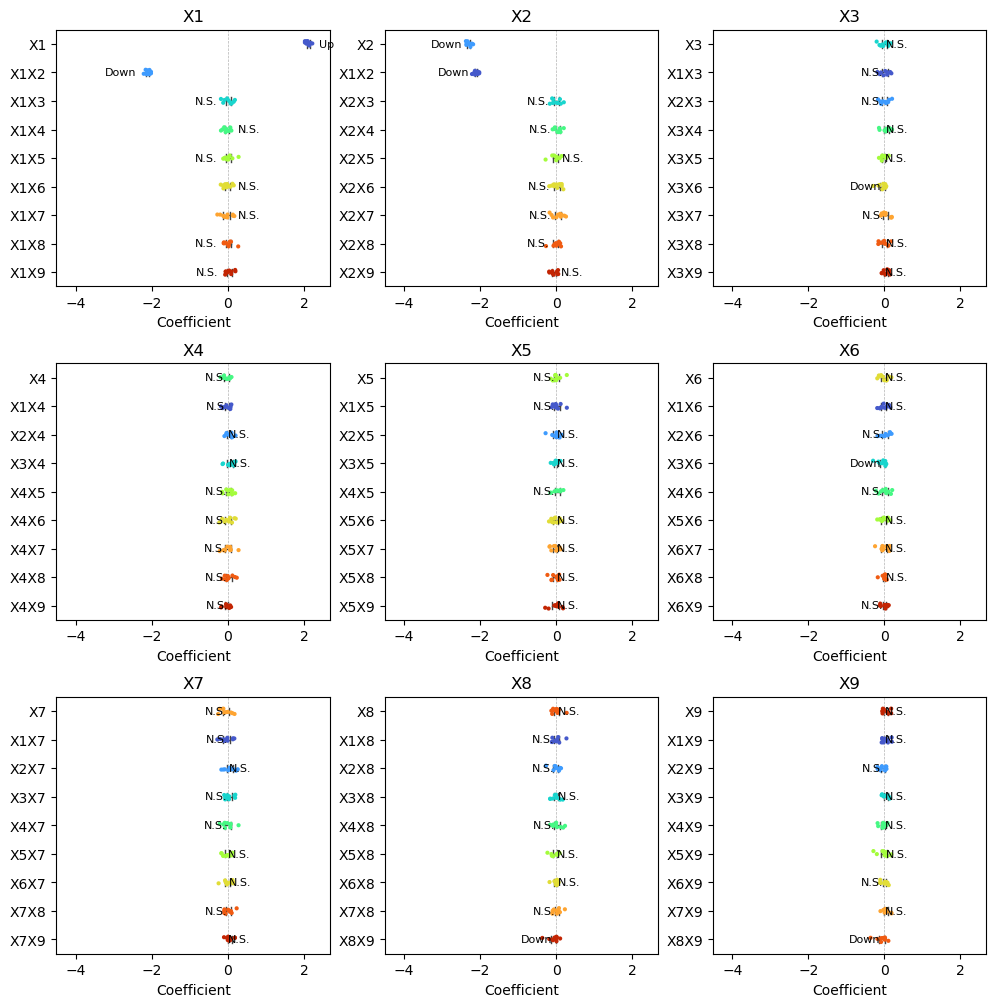

In [55]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=.3)

theoretical = TheoreticalEffects(simulation=model, interactions=True, order=2)

for i, a in enumerate(ax.ravel()):
    cmap=model.cmap.copy()
    theoretical.plot(
        ax=a, cmap=[cmap.pop(i)]+cmap, regex=f"X{i + 1}", 
        jitter_ratio=.06, xscales=np.array([1.8, 1.1]), 
        **kwarg_err
    )
    a.set_title(f"X{i + 1}")

common_xlim = np.abs(
    np.array([a.get_xlim() for a in ax.ravel()])
).max(axis=0) * np.array([-1, 1])

[a.set_xlim(common_xlim) for a in ax.ravel()];

# fig.suptitle(
#     f"{model.metadata['design']}-based second-order model for {model.name} (N={model.metadata['n_rep']})", 
#     y=.93
# );

# if conf.savefig:
#     fig.savefig(f"{conf.out}/ff_sim_mlr_all{conf.suffix}", **kwarg_savefig)

In [141]:
import statsmodels.api as sm

In [234]:
X = lambda m: sm.add_constant(m.exmatrix.values)
Y = lambda m: m.exresult.reshape(-1, 1)

P = lambda x: x @ np.linalg.inv(x.T @ x) @ x.T

Xi = lambda m, i: m.exmatrix.values[:, i].reshape(-1, 1)
Xr = lambda m, i: sm.add_constant(m.exmatrix.values[:, [idx for idx in range(m.n_factor) if idx != i]])

Qr = lambda m, i: np.eye(len(X(m))) - P(Xr(m, i))

phi_i = lambda m, i: np.linalg.matrix_rank(Qr(m, i) @ Xi(m, i))
SSi = lambda m, i: Y(m).T @ P(Qr(m, i) @ Xi(m, i)) @ Y(m)

phi_e = lambda m: len(X(m)) - np.linalg.matrix_rank(X(m))
SSe = lambda m: Y(m).T @ (np.eye(len(X(m))) - P(X(m))) @ Y(m)
sigma2 = lambda m: SSe(m) / phi_e(m)

norm2 = lambda vec: vec.T @ vec

beta = lambda x, y: np.linalg.inv(x.T @ x) @ x.T @ y

lambda_i = lambda m, i: norm2(Qr(m, i) @ Xi(m, i) @ beta(Xi(m, i), Y(m))) / sigma2(m)

Fi = lambda m, i: (SSi(m, i) / phi_i(m, i)) / sigma2(m)


from scipy.stats import f, ncf

power = lambda m, i: ncf.sf(
    x=f.isf(q=0.05, dfn=phi_i(m, i), dfd=phi_e(m)),
    dfn=phi_i(m, i), dfd=phi_e(m),
    nc=lambda_i(m, i)
)

In [293]:
# model = Sim1()
model = [Sim1, Circuit, Sparse][2]()
# model = Test4(edge_assignsment=np.ones(10))
model.simulate(
    design=[CLOO, PlackettBurman, FullFactorial][0],
    n_rep=10
)

<AxesSubplot: >

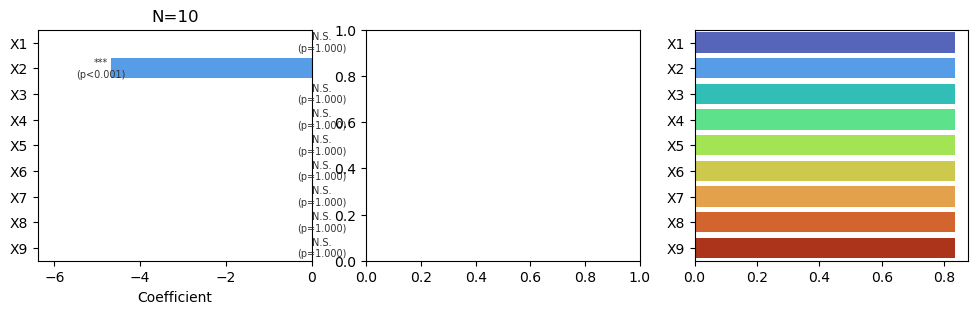

In [294]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

mlr = MLR(model)
mlr.plot(anova=True, jitter_ratio=.05, ax=ax[0])

# sns.barplot(
#     data=ff_anova_power(model, mlr),
#     y=model.metadata["factor_list"],
#     x="power", ax=ax[1]
# )

sns.barplot(
    x=np.vectorize(lambda i: power(model, i))(np.arange(9)),
    y=model.metadata["factor_list"], ax=ax[-1], palette=model.cmap
)

In [288]:
f.sf(
    x=f.isf(q=0.05, dfn=phi_i(model, 0), dfd=phi_e(model)),
    dfn=phi_i(model, 0), dfd=phi_e(model)
)

0.04999999999999998

In [210]:
np.vectorize(lambda i: lambda_i(model, i))(np.arange(9))

array([29.34615978, 18.58984594, 62.13350466, 77.66082552, 76.43721154,
       78.14801368, 78.12880454, 34.70637917, 37.24990153])

In [221]:
np.vectorize(lambda i: Fi(model, i))(np.arange(9))

array([1.50068770e+00, 1.59126290e+01, 2.43853511e+01, 5.27554595e+01,
       5.02545554e+01, 5.37625020e+01, 5.37226752e+01, 1.60156037e-03,
       2.40222300e-01])

In [211]:
lambda_i(model, 0)

array([[29.34615978]])

In [212]:
SSe(model) / phi_e(model)

array([[35228.1857085]])

In [213]:
norm2(Qr(model, 0) @ Xi(model, 0) @ beta(Xi(model, 0), Y(model))) / (SSe(model) / phi_e(model))

array([[29.34615978]])

In [214]:
beta(Xi(model, 0), Y(model))

array([[508.3827216]])

In [215]:
phi_i(model, 0)

1

In [216]:
phi_e(model)

10

In [223]:
ff_mlr = MLR(model, interactions=False)
ff_mlr.result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     32.86
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           6.36e-51
Time:                        14:22:02   Log-Likelihood:                -7094.3
No. Observations:                1024   AIC:                         1.421e+04
Df Residuals:                    1014   BIC:                         1.426e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.9682      7.755     11.086      0.000      70.751     101.185
X1             0.6694      7.755      0.086      0.931     -14.547      15.886
X2           -11.6472      7.755     -1.502      0.133     -26.864       3.570
X3            33.0165      7.755      4.258      0.000      17.800      48.233
X4            57.9873      7.755      7.478      0.000      42.771      73.204
X5            58.2729      7.755      7.515      0.000      43.056      73.490
X6            68.0398      7.755      8.774      0.000      52.823      83.257
X7            71.7314      7.755      9.250      0.000      56.515      86.948
X8             4.6921      7.755      0.605      0.545     -10.525      19.909
X9             1.7329      7.755      0.223      0.823     -13.484      16.950
==============================================================================
Omnibus:                      898.732   Durbin-Watson:                   0.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21405.527
Skew:                           4.102   Prob(JB):                         0.00
Kurtosis:                      23.842   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
from doe_modules.simulation import ff_anova_power

In [236]:
ff_anova_power(model, ff_mlr)

,coef,std,dfn,dfd,nc,power
X1,0.669377,51.759714,1.0,1014.0,0.171261,0.069802
X2,-11.647231,51.759714,1.0,1014.0,51.851537,1.000000
X3,33.016550,51.759714,1.0,1014.0,416.657882,1.000000
X4,57.987270,51.759714,1.0,1014.0,1285.232048,1.000000
X5,58.272921,51.759714,1.0,1014.0,1297.925632,1.000000
X6,68.039790,51.759714,1.0,1014.0,1769.465740,1.000000
X7,71.731419,51.759714,1.0,1014.0,1966.686185,1.000000
X8,4.692076,51.759714,1.0,1014.0,8.414848,0.825910
X9,1.732924,51.759714,1.0,1014.0,1.147824,0.188058


In [238]:
np.vectorize(lambda i: power(model, i))(np.arange(9))

array([0.05085238, 0.32324523, 0.98909662, 0.99999998, 0.99999999,
       1.        , 1.        , 0.09280214, 0.05572944])

In [239]:
np.vectorize(lambda i: lambda_i(model, i))(np.arange(9))

array([7.45129891e-03, 2.25598169e+00, 1.81281521e+01, 5.59184960e+01,
       5.64707746e+01, 7.69867691e+01, 8.55675314e+01, 3.66117281e-01,
       4.99400665e-02])

In [135]:
X(model)

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.]])

In [136]:
phi_e(model)

1

In [137]:
np.linalg.matrix_rank(Qr(model, 0) @ Xi(model, 0))

1

In [95]:
np.eye(len(Pr(model, 0))) - Pr(model, 0)

array([[ 0.984375  , -0.01171875, -0.01171875, ...,  0.01171875,
         0.01171875,  0.015625  ],
       [-0.01171875,  0.984375  , -0.0078125 , ...,  0.0078125 ,
         0.015625  ,  0.01171875],
       [-0.01171875, -0.0078125 ,  0.984375  , ...,  0.015625  ,
         0.0078125 ,  0.01171875],
       ...,
       [ 0.01171875,  0.0078125 ,  0.015625  , ...,  0.984375  ,
        -0.0078125 , -0.01171875],
       [ 0.01171875,  0.015625  ,  0.0078125 , ..., -0.0078125 ,
         0.984375  , -0.01171875],
       [ 0.015625  ,  0.01171875,  0.01171875, ..., -0.01171875,
        -0.01171875,  0.984375  ]])

In [80]:
Pr(model, 0).shape

(512, 512)

In [76]:
model.n_factor

9

In [74]:
model.exmatrix.values[:, [idx for idx in range(model.n_factor) if idx != 0]]

(512, 8)

In [65]:
P(model)

array([[ 0.01757812,  0.01367188,  0.01367188, ..., -0.01367188,
        -0.01367188, -0.01757812],
       [ 0.01367188,  0.01757812,  0.00976562, ..., -0.00976562,
        -0.01757812, -0.01367188],
       [ 0.01367188,  0.00976562,  0.01757812, ..., -0.01757812,
        -0.00976562, -0.01367188],
       ...,
       [-0.01367188, -0.00976562, -0.01757812, ...,  0.01757812,
         0.00976562,  0.01367188],
       [-0.01367188, -0.01757812, -0.00976562, ...,  0.00976562,
         0.01757812,  0.01367188],
       [-0.01757812, -0.01367188, -0.01367188, ...,  0.01367188,
         0.01367188,  0.01757812]])

In [57]:
hoge = theoretical_effects(model, interactions=True, order=2)

NameError: name 'theoretical_effects' is not defined

In [58]:
hoge[hoge["term"].str.contains("X1")]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
theoretical_effects_encoder(model, interactions=True, order=2).loc["X1"]

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

model = [Sim1, Circuit, Sparse][-1]()
jitter_ratio=.04

for sigma, a in zip([.5, 1, 2], ax.ravel()):

    plot_theoretical_effects(
        model, interactions=False, model_kwargs=dict(kwarg_err=dict(loc=0, scale=sigma)),
        ax=a, jitter_ratio=jitter_ratio,
        **dict(capsize=.25, errwidth=1, linewidth=1,)
    )

    a.set(ylabel="", title="$\sigma=" + f"{sigma}" + "$")
    a.set_xlim(np.array(a.get_xlim()) * np.array([(1 + jitter_ratio * 20), (1 + jitter_ratio * 2)]))

In [ ]:
fig, ax = plt.subplots(figsize=(9, 3))

data = theoretical_effects(model, interactions=False, order=2, n_rep=10)

sns.barplot(
    data=data,
    x="Coefficient", y="term", ax=ax,
    palette=circuit, 
    alpha=.5,
    edgecolor=circuit,
    n_boot=9999,
    **dict(capsize=.25, errwidth=1, linewidth=1,)
)

# sns.swarmplot(
#     data=data,
#     x="effects", y="term", ax=ax, legend=False, 
#     # hue="term", 
#     color=".2"
# )

ax.set(ylabel="")

# ax.get_legend().remove()

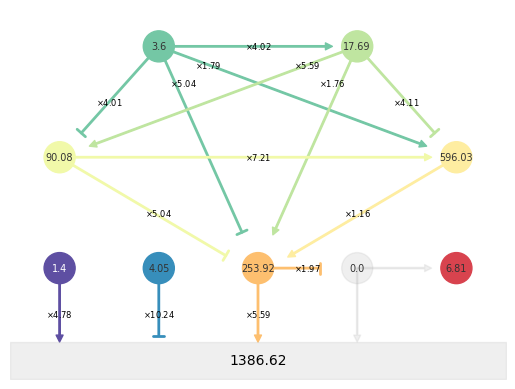

In [725]:
fig, ax = plt.subplots()
model.plot(ax=ax)

In [742]:
theoretical_effects_encoder(model, interactions=False, order=2, n_rep=10, dtype=int).values.ravel()

array([ 1, -1,  1,  1,  1,  1,  1,  1,  0])

In [512]:
get_main_effect(model)

array([216.33489667, 359.71310791, 402.15498921, 404.93082572])

In [513]:
get_2way_interactions(model)

array([110.01002452, 164.0807174 , 115.18368427, 218.52066881,
       224.72531151, 285.15851658])

In [526]:
FullFactorial().get_exmatrix(4).interactions(3).columns.tolist()

['X1',
 'X2',
 'X3',
 'X4',
 'X1X2',
 'X1X3',
 'X1X4',
 'X2X3',
 'X2X4',
 'X3X4',
 'X1X2X3',
 'X1X2X4',
 'X1X3X4',
 'X2X3X4']

In [487]:
(
    FullFactorial().get_exmatrix(4).interactions(2)["X1X2"].values * model.exresult
).mean()

110.01002451955051

In [469]:
get_main_effects(model.exresult, 4)

array([432.66979334, 719.42621582, 804.30997842, 809.86165144])

In [509]:
get_main_effects2(model)

array([216.33489667, 359.71310791, 402.15498921, 404.93082572])

In [502]:
pospos, posneg, negpos, negneg = get_2way_interactions(model)

In [503]:
(pospos - posneg) - (negpos - negneg)

array([ 59.82531182, 273.27103994, 649.56950573, 777.49453483])

In [507]:
((pospos - posneg) - (negpos - negneg))

array([ 59.82531182, 273.27103994, 649.56950573, 777.49453483])

In [506]:
get_2way_interactions2(model)

array([110.01002452, 164.0807174 , 115.18368427, 218.52066881,
       224.72531151, 285.15851658])

In [284]:
model.exresult[(0, 2),]

array([0.        , 0.78260737])

In [256]:
model.exresult[::-1][1] == model.exresult[-2]

True

In [283]:
np.diff(model.exresult.reshape(2, 2 ** (9 - 1)).T).mean()

5.939272800875433

In [372]:
col = 6
i = col + 1
np.diff([m.T for m in model.exresult.reshape(-1 , 2,  2 ** (9 - i))]).mean()

54.83281170502562

In [367]:
np.diff([m.T for m in model.exresult.reshape(-1 , 2,  2 ** 8)]).mean()

5.939272800875433

In [365]:
np.diff([m.T for m in model.exresult.reshape(-1 , 2,  2 ** 2)]).mean()

54.83281170502562

In [342]:
np.diff([m.T for m in model.exresult.reshape(-1 , 2,  2 ** 1)]).mean()

-17.378163917778814

In [366]:
np.diff([m.T for m in model.exresult.reshape(-1 , 2,  2 ** 0)]).mean()

-60.34852703735734

In [350]:
np.diff(model.exresult.reshape(-1, 2)).mean()

-60.34852703735734

In [260]:
model.exresult[::-1].reshape(2, -1)[:, -1]

array([9.93238145, 0.        ])